# DATA 622 | Assignment 7   
**Name:** Sanket Vijay Patil  
**ID** GW61258  

In [49]:
import requests
from bs4 import BeautifulSoup
from textblob import TextBlob
from transformers import pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
import newspaper
from newspaper import Article
import pandas as pd
import matplotlib.pyplot as plt

In [50]:

#url
url = "https://venturebeat.com/ai/sam-altman-at-ted-2025-inside-the-most-uncomfortable-and-important-ai-interview-of-the-year/"
response = requests.get(url)
soup = BeautifulSoup(response.text, "html.parser")

#text generation
paragraphs = [p.get_text() for p in soup.find_all("p")]
article_text = " ".join(paragraphs)
print("Article Extracted ")
print(article_text[:500], "...\n")  

#summerizing text
summarizer = pipeline("summarization", model="facebook/bart-large-cnn")

summary = summarizer(article_text, max_length=800, min_length=100, do_sample=False)[0]['summary_text']
print("Summary Based On LLM:\n")
print(summary)

Article Extracted 
We're verifying your browser   Vercel Security Checkpoint | iad1::1760928650-clB4vqrcWMP3JI4OWPRCVmo5NSS0O9DV Enable JavaScript to continue Vercel Security Checkpoint | iad1::1760928650-clB4vqrcWMP3JI4OWPRCVmo5NSS0O9DV ...



Device set to use mps:0
Your max_length is set to 800, but your input_length is only 91. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=45)


Summary Based On LLM:

Vercel Security Checkpoint | iad1::1760928650-clB4vqrcWMP3JI4OWPRCVmo5NSS0O9DV Enable JavaScript to continue. We're verifying your browser   Vercel Securitycheckpoint.com. Use the Daily Discussion to help people understand our new security checkpoint tool. We'll be back in a few days with more information on how to use the checkpoint. Please share your feedback with us at the bottom of the page.


 Top Topics:
       Keyword  Frequency
0      vercel          2
1    security          2
2  checkpoint          2
3   verifying          1
4        your          1
5     browser          1
6      enable          1
7  javascript          1
8    continue          1


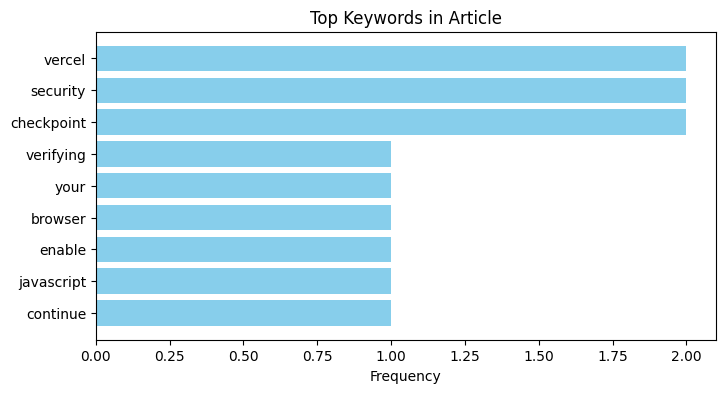


 LLM (TextBlob) Sentiment: Neutral (0.00)
 Naïve Bayes Sentiment: Negative


In [51]:
words = re.findall(r'\b[a-zA-Z]{4,}\b', article_text.lower())
freq = Counter(words)
common_words = freq.most_common(12)

keywords_df = pd.DataFrame(common_words, columns=['Keyword', 'Frequency'])
print(" Top Topics:\n", keywords_df)


plt.figure(figsize=(8,4))
plt.barh(keywords_df['Keyword'], keywords_df['Frequency'], color='skyblue')
plt.gca().invert_yaxis()
plt.title("Top Keywords in Article")
plt.xlabel("Frequency")
plt.show()

#Sentiment using LLM-like approach used textblog 
blob = TextBlob(article_text)
llm_sentiment = blob.sentiment.polarity
llm_sentiment_label = (
    "Positive" if llm_sentiment > 0.1 else
    "Negative" if llm_sentiment < -0.1 else
    "Neutral"
)
print(f"\n LLM (TextBlob) Sentiment: {llm_sentiment_label} ({llm_sentiment:.2f})")

#Compare with Naive Bayes classifier
sample_data = {
    'text': [
        "AI innovation creates exciting new opportunities.",
        "There are growing concerns about AI ethics and bias.",
        "Sam Altman seemed confident about OpenAI’s mission.",
        "The dangers of autonomous AI systems are frightening."
    ],
    'label': ['Positive', 'Negative', 'Positive', 'Negative']
}
df = pd.DataFrame(sample_data)

model = make_pipeline(CountVectorizer(), MultinomialNB())
model.fit(df['text'], df['label'])
predicted_label = model.predict([article_text])[0]

print(f" Naïve Bayes Sentiment: {predicted_label}")

 Emotion Scores:
 {'anticipation': 1, 'positive': 1, 'trust': 1}


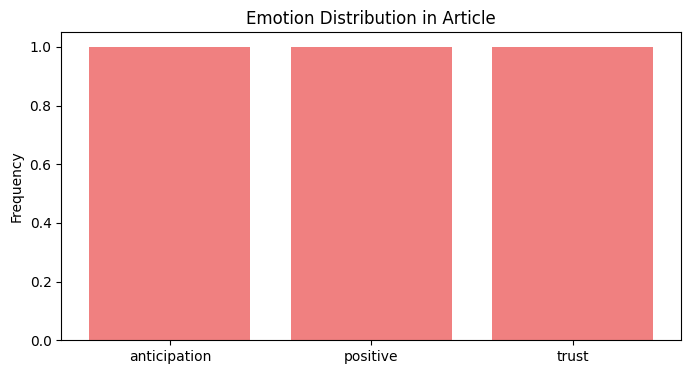

In [52]:

from nrclex import NRCLex

emotion = NRCLex(article_text)
emotion_scores = emotion.raw_emotion_scores

print(" Emotion Scores:\n", emotion_scores)

#emotions plotting
emo_df = pd.DataFrame(list(emotion_scores.items()), columns=['Emotion', 'Count'])
emo_df = emo_df.sort_values(by='Count', ascending=False)

plt.figure(figsize=(8,4))
plt.bar(emo_df['Emotion'], emo_df['Count'], color='lightcoral')
plt.title("Emotion Distribution in Article")
plt.ylabel("Frequency")
plt.show()

In [53]:
import spacy
nlp = spacy.load("en_core_web_sm")
doc = nlp(article_text)

entities = [(ent.text, ent.label_) for ent in doc.ents]
entities_df = pd.DataFrame(entities, columns=["Entity", "Type"]).value_counts().head(10)

print("Key Entities:\n", entities_df)


main_theme = """
The article is about Sam Altman's reflections at TED 2025 regarding the equilibrium of
OpenAI’s rapid technological growth and the ethical, creative, and safety challenges of advanced AI.
It places emphasis on responsibility, accountability, and the human impact of artificial intelligence development.
"""

print("\n Main Theme:\n", main_theme)

Key Entities:
 Entity                      Type  
Vercel Security Checkpoint  ORG       1
                            PERSON    1
Name: count, dtype: int64

 Main Theme:
 
The article is about Sam Altman's reflections at TED 2025 regarding the equilibrium of
OpenAI’s rapid technological growth and the ethical, creative, and safety challenges of advanced AI.
It places emphasis on responsibility, accountability, and the human impact of artificial intelligence development.



In [54]:
!pip install playwright
!playwright install

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


     |████████████████████████████████| 38.7 MB 46.0 MB/s eta 0:00:01
     |████████████████████████████████| 269 kB 42.4 MB/s eta 0:00:01
You should consider upgrading via the '/Users/sanketpatil/jupyter_env/bin/python3 -m pip install --upgrade pip' command.


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


129.7 MiB [                    ] 0% 0.0s129.7 MiB [                    ] 0% 35.7s129.7 MiB [                    ] 0% 25.0s129.7 MiB [                    ] 0% 16.3s129.7 MiB [                    ] 0% 11.8s129.7 MiB [                    ] 1% 7.8s129.7 MiB [                    ] 1% 6.2s129.7 MiB [                    ] 2% 5.4s129.7 MiB [=                   ] 2% 5.0s129.7 MiB [=                   ] 3% 4.7s129.7 MiB [=                   ] 3% 4.4s129.7 MiB [=                   ] 4% 4.2s129.7 MiB [=                   ] 4% 4.1s129.7 MiB [=                   ] 5% 3.9s129.7 MiB [=                   ] 6% 3.8s129.7 MiB [=                   ] 6% 3.7s129.7 MiB [=                   ] 7% 3.6s129.7 MiB [==                  ] 7% 3.5s129.7 MiB [==                  ] 7% 3.6s129.7 MiB [==                  ] 8% 3.4s129.7 MiB [==                  ] 9% 3.4s129.7 MiB [==                  ] 10% 3.3s129.7 MiB [==                  ] 11% 3.2s129.7 MiB [==                  ] 12% 3.2s129.7 MiB [===                 ] 